In [1]:
import seaborn as sns
import pandas as pd

# Dataset of Starcraft 2 games, played in different leagues/levels.
df = pd.read_csv('starcraft.csv') 
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,4719.552127,4.120731,21.650389,15.909527,960.421809,114.575763,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713819,64.209584,5.266955,22.116836,0.001031,6.541043,0.000060,0.000142
std,2656.919630,1.448170,4.206357,11.964495,17318.133922,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057191,19.037394,1.500605,7.440875,0.000520,1.859049,0.000112,0.000266
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2423.250000,3.000000,19.000000,8.000000,300.000000,79.231500,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326600,50.886425,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4788.000000,4.000000,21.000000,12.000000,500.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,6994.750000,5.000000,24.000000,20.000000,800.000000,140.156100,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510425,74.032525,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,9271.000000,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


Чем больше игрок практикуется, тем он быстрее


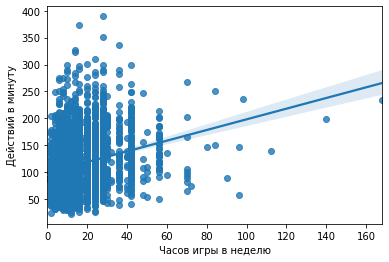

In [2]:
sns.regplot(data=df, x='HoursPerWeek', y='APM').set(xlabel='Часов игры в неделю', ylabel='Действий в минуту')
print('Чем больше игрок практикуется, тем он быстрее')

Много хоткеев назначают в 2 случаях: если уникальных юнитов много, либо игра ведется на высоком уровне


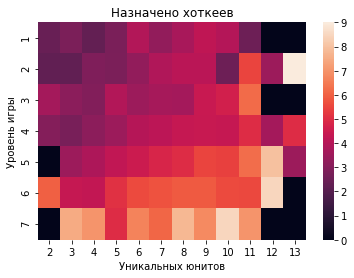

In [3]:
ax = sns.heatmap(df.pivot_table(index='LeagueIndex', columns='UniqueUnitsMade', values='UniqueHotkeys', aggfunc='mean').fillna(0))
ax.set_title('Назначено хоткеев')
ax.set(xlabel='Уникальных юнитов', ylabel='Уровень игры')
print('Много хоткеев назначают в 2 случаях: если уникальных юнитов много, либо игра ведется на высоком уровне')

Уровень игры почти не зависит от кол-ва практики, пока речь не идет о профессиональном уровне.
Профессиональные киберспортсмены тренируются много


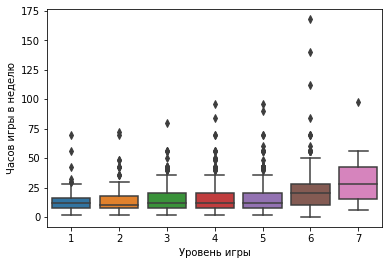

In [4]:
sns.boxplot(data=df, x='LeagueIndex', y='HoursPerWeek').set(xlabel='Уровень игры', ylabel='Часов игры в неделю')
print('Уровень игры почти не зависит от кол-ва практики, пока речь не идет о профессиональном уровне.\nПрофессиональные киберспортсмены тренируются много')

Скорость реакции игрока почти соответствует нормальному распределению.
Выбросы справа, скорее всего, появляются в результате технических проблем (высокий пинг, тормозящая игра и т.п.)


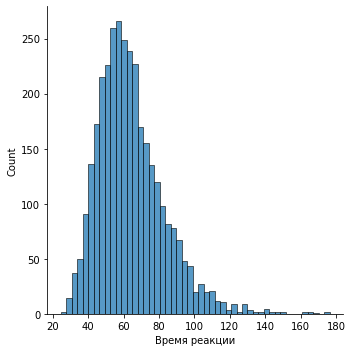

In [5]:
sns.displot(df.ActionLatency).set(xlabel='Время реакции')
print('Скорость реакции игрока почти соответствует нормальному распределению.\nВыбросы справа, скорее всего, появляются в результате технических проблем (высокий пинг, тормозящая игра и т.п.)')